In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!ls drive/My\ Drive/machine-learning/projects/grad-admits

drive  sample_data


In [ ]:
%cd drive/My\ Drive/machine-learning/projects/grad-admits

/content/drive/My Drive/machine-learning/projects/grad-admits


#### If you are using Google colab, then only will you need to run the above 3 cells, and change the path accordingly, else you can start your code from here

In [ ]:
import pandas as pd

**Importing Data**

In [ ]:
df = pd.read_csv('./data/Admission_Predict.csv')

**Data analysis**

In [ ]:
df.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [ ]:
df.shape

(400, 8)

In [ ]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [ ]:
df = df.drop(['Serial No.'], axis=1)

In [ ]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

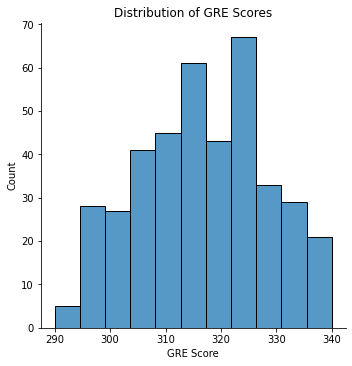

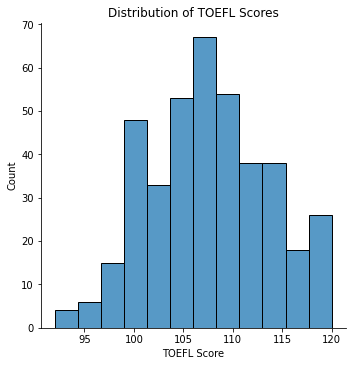

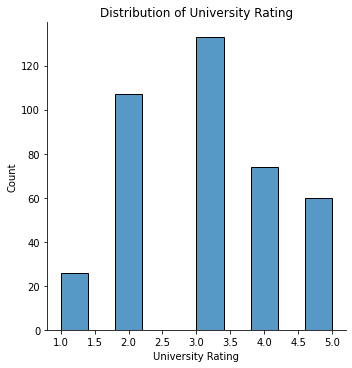

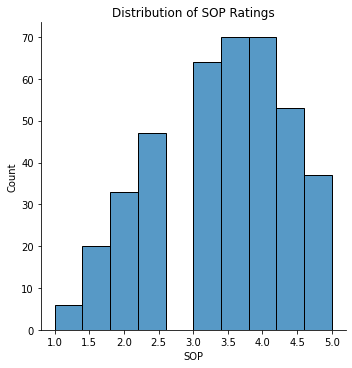

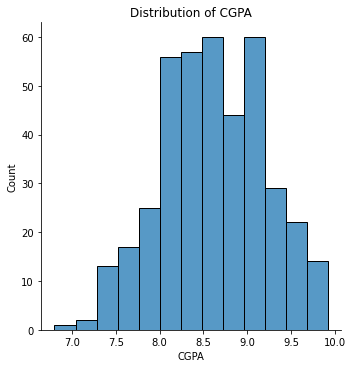

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = sns.displot(df['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

fig = sns.displot(df['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

fig = sns.displot(df['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

fig = sns.displot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

fig = sns.displot(df['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

plt.show()

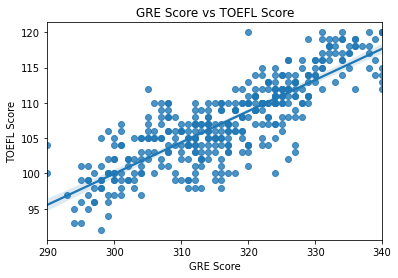

In [ ]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

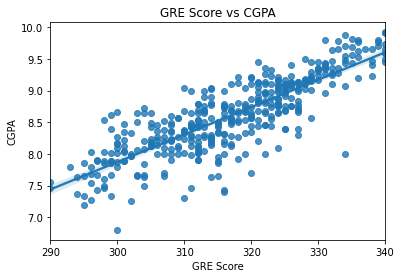

In [ ]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

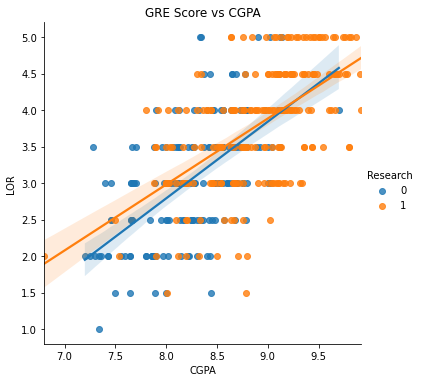

In [ ]:
fig = sns.lmplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

In [ ]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

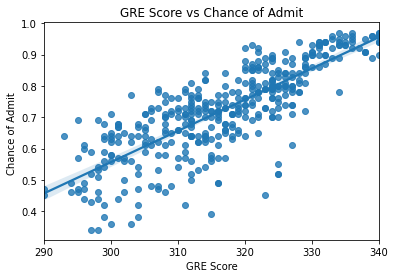

In [ ]:
fig = sns.regplot(x="GRE Score", y="Chance of Admit ", data=df)
plt.title("GRE Score vs Chance of Admit")
plt.show()

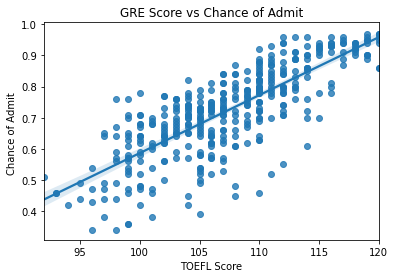

In [ ]:
fig = sns.regplot(x="TOEFL Score", y="Chance of Admit ", data=df)
plt.title("GRE Score vs Chance of Admit")
plt.show()

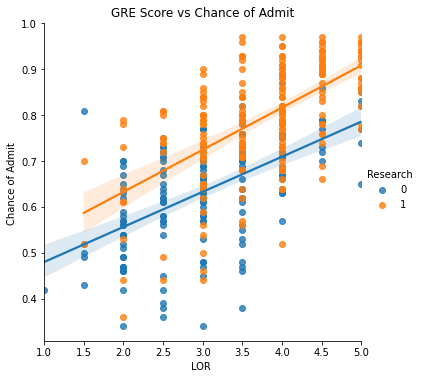

In [ ]:
fig = sns.lmplot(x="LOR ", y="Chance of Admit ", data=df, hue="Research")
plt.title("GRE Score vs Chance of Admit")
plt.show()

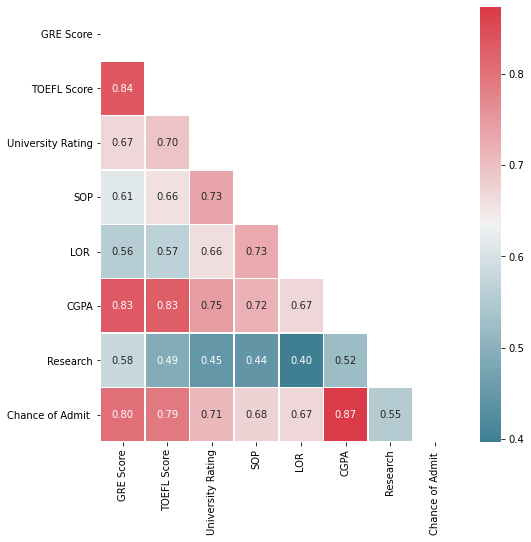

In [ ]:
import numpy as np
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15, shuffle=False)

In [ ]:
print("Training Set")
print(X_train.shape)
print(y_train.shape)

Training Set
(340, 7)
(340,)


In [ ]:
print("Test Set")
print(X_test.shape)
print(y_test.shape)

Test Set
(60, 7)
(60,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.coef_

array([ 0.0015272 ,  0.00318158,  0.00968154, -0.00479612,  0.02509305,
        0.11413152,  0.0209314 ])

In [ ]:
list(zip(list(X), model.coef_))

[('GRE Score', 0.0015272002875839309),
 ('TOEFL Score', 0.0031815829625955958),
 ('University Rating', 0.009681537303969048),
 ('SOP', -0.004796119146356175),
 ('LOR ', 0.02509304903884417),
 ('CGPA', 0.11413151500844042),
 ('Research', 0.020931402695670703)]

In [ ]:
model.intercept_

-1.196378576853185

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print("Mean Absolute Error: ", mean_absolute_error(y_test,predictions))

Mean Absolute Error:  0.047966886125609925


In [ ]:
print("Mean Squared Error: ", mean_squared_error(y_test,predictions))

Mean Squared Error:  0.004255358714557166


In [ ]:
print("Model score: ", r2_score(y_test,predictions))

Model score:  0.8350465662643232


In [ ]:
from sklearn.ensemble import RandomForestRegressor
classifier = RandomForestRegressor()
classifier.fit(X,y)
feature_names = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = X.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

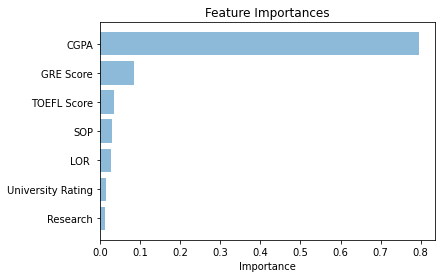

In [ ]:
plt.barh([1,2,3,4,5,6,7], importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks([1,2,3,4,5,6,7], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()